Saving GreenBackground.png to GreenBackground (2).png
Saving NewBackground.jpg to NewBackground (2).jpg
Saving Object.png to Object (2).png


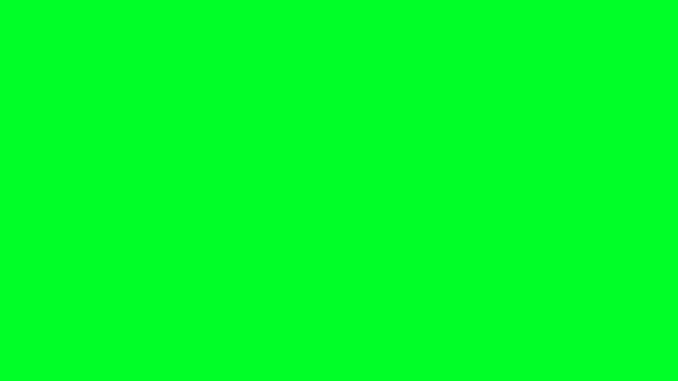

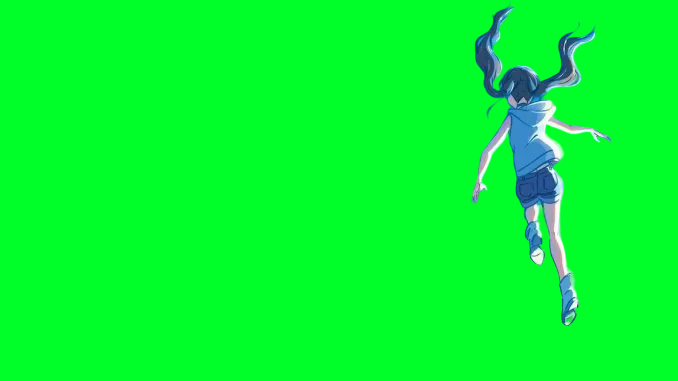

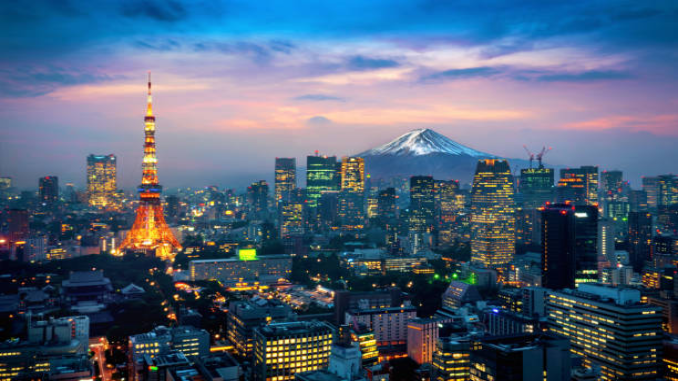

In [12]:
from google.colab import files
import cv2
import numpy as np

# Upload images
uploaded = files.upload()

# Read images
bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

from google.colab.patches import cv2_imshow
cv2_imshow(bg1_image)
cv2_imshow(ob_image)
cv2_imshow(bg2_image)


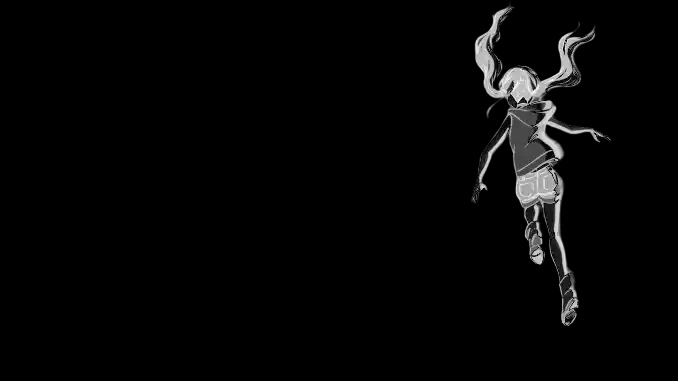

In [13]:
import cv2
import numpy as np

def compute_difference(bg_img, input_img):
    # Convert images to grayscale
    bg_gray = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)
    input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two images
    difference = cv2.absdiff(bg_gray, input_gray)

    # Normalize the difference image to the range [0, 255]
    difference_single_channel = cv2.normalize(difference, None, 0, 255, cv2.NORM_MINMAX)

    return difference_single_channel

difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

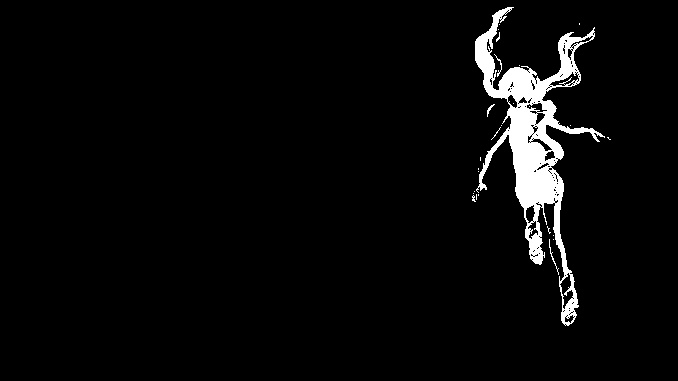

In [14]:
import cv2
import numpy as np

def compute_binary_mask(difference_single_channel):
    # Threshold the difference image to create a binary mask
    _, difference_binary = cv2.threshold(difference_single_channel, 50, 255, cv2.THRESH_BINARY)

    return difference_binary

binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

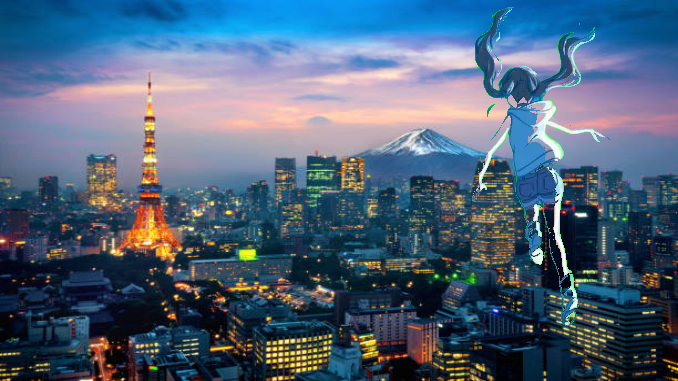

In [17]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(
        bg1_image,
        ob_image
    )
    binary_mask = compute_binary_mask(difference_single_channel)

    binary_mask_expanded = np.expand_dims(binary_mask, axis=-1)

    output = np.where(binary_mask_expanded == 255, ob_image, bg2_image)
    return output

output_image = replace_background(bg1_image, bg2_image, ob_image)

cv2_imshow(output_image)